# ECG classification

Laurent Cetinsoy - Datadidacte


In [1]:
from IPython.display import HTML

## A first naive model by extracting simple features


Your environment contains variables arr, nsr, and chf which respectively contain 10-second recordings of ECG signals extracted from three datasets on PhysioNet: one from a person suffering from arrhythmia, one from a person with a normal heart rhythm, and another from a person with heart failure.


Matplotlib  subplots (or any other library), display these signals on three subfigures (the subplots should be called with the parameter nrows = 3).
Can you find any differences between them?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split

arr = np.loadtxt('arr.txt')
chf = np.loadtxt('chf.txt')
nsr = np.loadtxt('nsr.txt')

Text(0.5, 1.0, 'NSR Normal sinus rhythm')

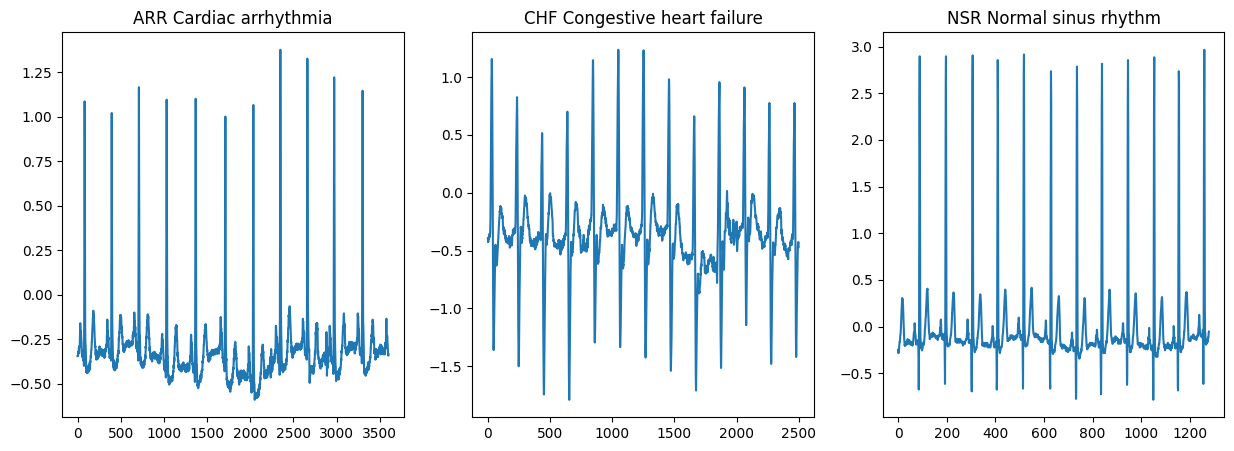

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(arr)
axes[0].set_title('ARR Cardiac arrhythmia')
axes[1].plot(chf)
axes[1].set_title('CHF Congestive heart failure')
axes[2].plot(nsr)
axes[2].set_title('NSR Normal sinus rhythm')

We want to extract features from the time series. For that we will use simple statistics.


Create a function named calculate_stats_features(x) that calculates some statistical features of a signal x using standard numpy functions: nanpercentile, nanmean, etc.
calculate_stats_features will return a list of features in this order:

0. Max
1. Min
2. Mean
3. Median
4. Variance

In [4]:
def calculate_stats_features(x):
    return {
        'max': np.max(x),
        'min': np.min(x),
        'mean': np.nanmean(x),
        'median': np.nanmedian(x),
        'var': np.nanvar(x),
    }



Create a function named `calculate_zero_crossing(x)` that calculates the Zero
Crossing of a signal x.

The zero crossing is defined as the number of times the signal changes sign.
For this, you can use the signbit, diff, and nonzero functions from numpy.


In [5]:
def calculate_zero_crossing(x):
    return np.sum(np.diff(np.sign(x)) != 0)

Create a function named **calculate_rms(x)** that returns the Root Mean Square (RMS) of a signal x. We will use the nanmean function instead of the mean function from numpy.

In [6]:
def calculate_rms(x):
    return np.sqrt(np.nanmean(x ** 2))

Create a function named calculate_entropy(x) that calculates the Shannon entropy of a signal x using the entropy function from scipy.stats.

In [7]:
def calculate_entropy(x):
    """
    Calculate the Shannon entropy of a signal.
    """
    hist, _ = np.histogram(x, bins=256)
    hist = hist[hist > 0]
    return stats.entropy(hist)

Create a function get_features(x) that combines the features calculated by all previous functions including caculate_stats_features.

In [8]:
def get_features(x):
    return {
        **calculate_stats_features(x),
        'zero_crossing': calculate_zero_crossing(x),
        'rms': calculate_rms(x),
        'entropy': calculate_entropy(x),
    }

Load the small ecg dataset
Use your fonction get_features create a new dataframe where you have all the feature as X and y as the label.
Train a random forest on it after doing a train test split if the dataset is not too small

In [9]:
df = pd.read_csv('ecg_small_dataset.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15352,15353,15354,15355,15356,15357,15358,15359,15360,15361
0,205,1,-0.429539,-0.431368,-0.427633,-0.453029,-0.460659,-0.448497,-0.469340,-0.475054,...,-0.299412,-0.341126,-0.364847,-0.360565,-0.358913,-0.406275,-0.452011,-0.440424,-0.417412,-0.419938
1,205,1,-0.527040,-0.542357,-0.539678,-0.541406,-0.518841,-0.505650,-0.523337,-0.532713,...,-0.523533,-0.542245,-0.544550,-0.523466,-0.510608,-0.497607,-0.508469,-0.495939,-0.479749,-0.484566
2,chf14,2,-0.410425,-0.416644,-0.424048,-0.398195,-0.393680,-0.386315,-0.371686,-0.377065,...,-0.288222,-0.742357,-1.088831,-1.347331,-1.349561,-1.165759,-1.004126,-0.829844,-0.671777,-0.536377
3,chf14,2,-0.007009,-0.069041,-0.063572,-0.080944,-0.070556,-0.098701,-0.090165,-0.108852,...,-1.906522,-1.694052,-1.534222,-1.338660,-1.167661,-0.989236,-0.777201,-0.544748,-0.313120,-0.032588
4,18184,0,-0.325000,-0.395000,-0.255000,-0.335000,-0.375000,-0.335000,-0.285000,-0.275000,...,-0.085000,-0.105000,-0.135000,-0.135000,-0.155000,-0.155000,-0.135000,-0.145000,-0.125000,-0.115000


In [10]:
y = df['1']
X = df.drop(columns=['0', '1'])

X_df = pd.DataFrame()
for rows in X.iterrows():
    row_df = pd.DataFrame([get_features(rows[1])])
    X_df = pd.concat([X_df, row_df], ignore_index=True)
X_df.head()

,max,min,mean,median,var,zero_crossing,rms,entropy
0,1.002118,-0.592731,-0.340759,-0.376057,0.032634,358,0.385683,3.860612
1,-0.281521,-0.923734,-0.510468,-0.505293,0.003658,0,0.514039,4.451724
2,1.235749,-2.492697,-0.344063,-0.354895,0.146738,418,0.514895,4.414542
3,1.295494,-3.105455,-0.195126,-0.133382,0.721041,384,0.871272,4.839228
4,2.445000,-1.005000,-0.046349,-0.105000,0.133627,1150,0.368477,4.138573


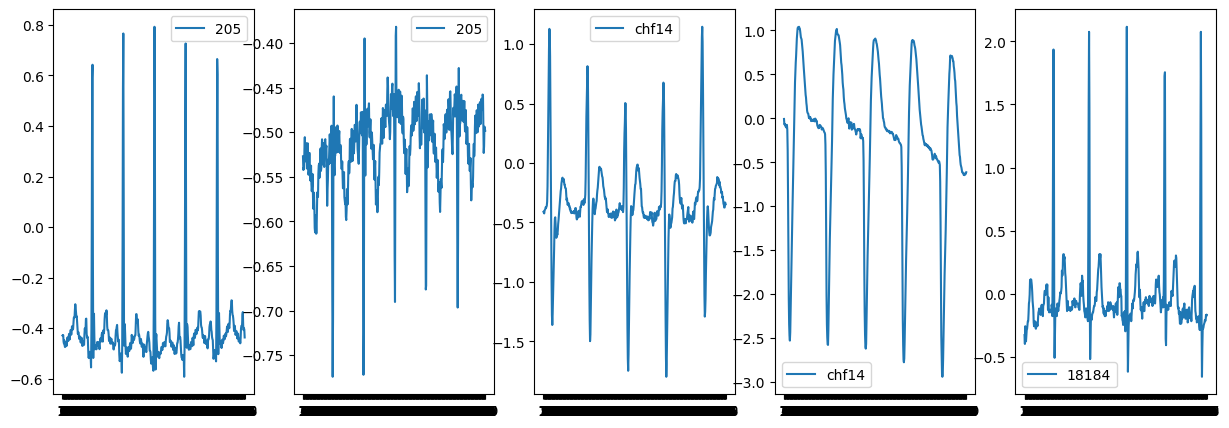

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    axes[i].plot(df.iloc[i, 2:500], label=df.iloc[i, 0])
    axes[i].legend()

Now you have a first pipeline, do the same on the full dataset
Report the train and test loss

In [12]:
df = pd.read_csv('ECG-laurent.csv')

y = df['1']
X = df.drop(columns=['0', '1'])

X_df = pd.DataFrame()
for rows in X.iterrows():
    row_df = pd.DataFrame([get_features(rows[1])])
    X_df = pd.concat([X_df, row_df], ignore_index=True)
X_df.head()

/tmp/ipykernel_174190/1700843762.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ECG-laurent.csv')


,max,min,mean,median,var,zero_crossing,rms,entropy
0,3.006143,-2.460911,-0.268554,-0.346791,0.420271,4154,0.701707,4.651426
1,2.527708,-3.550697,-0.221014,-0.106818,0.536639,3768,0.765171,4.372424
2,2.264555,-3.929179,-0.163022,-0.153941,0.182135,2253,0.456849,4.143141
3,3.055421,-1.906982,0.053962,0.051409,0.158568,3102,0.401846,4.351070
4,2.035001,-1.575197,-0.148872,-0.174830,0.111417,4748,0.365486,4.475005


Text(0, 20, 'same amount of 0 and 2, but 1 is more frequent')

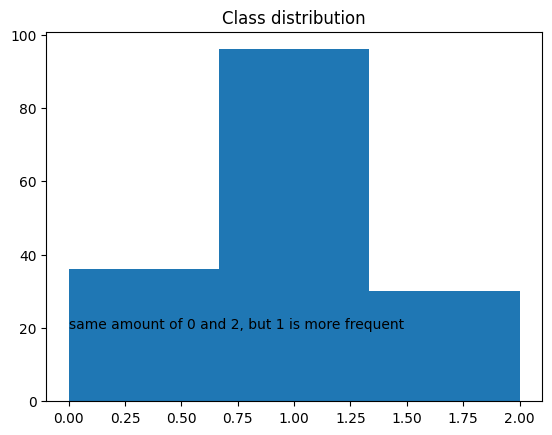

In [13]:
plt.hist(y, bins=3)
plt.title('Class distribution')
plt.text(0, 20, 'same amount of 0 and 2, but 1 is more frequent')

Text(0.5, 1.0, 'test')

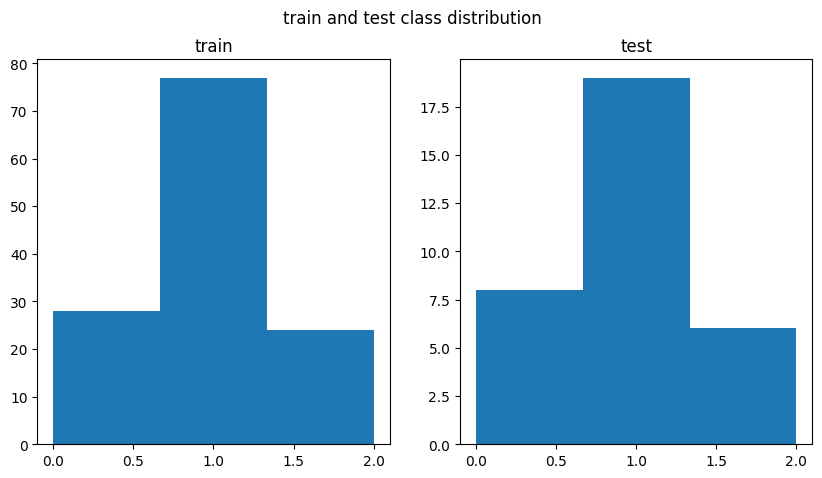

In [14]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('train and test class distribution')
axes[0].hist(y_train, bins=3)
axes[0].set_title('train')
axes[1].hist(y_test, bins=3)
axes[1].set_title('test')

In [15]:
model = RandomForestClassifier(
    n_estimators=100, random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.79      1.00      0.88        19
           2       1.00      0.33      0.50         6

    accuracy                           0.85        33
   macro avg       0.93      0.74      0.77        33
weighted avg       0.88      0.85      0.83        33



try to tweak the model hyperparameter to see if it works

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': None, 'n_estimators': 200}
0.8064615384615385
RandomForestClassifier(n_estimators=200, random_state=42)
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.79      1.00      0.88        19
           2       1.00      0.33      0.50         6

    accuracy                           0.85        33
   macro avg       0.93      0.74      0.77        33
weighted avg       0.88      0.85      0.83        33



## Fourier transform features

We want now to see if a model using only fourier transform could work.

create a function get_fourier_coefficients(ecg)

In [17]:
def get_fourier_coefficients(x):
    """
    Get the Fourier coefficients of a signal.
    """
    fourier = np.fft.fft(x)
    return fourier

Using this function create a dataframe df_fourrier containing the fourrier transform coefficients and the label

In [18]:
df_fourier = pd.DataFrame()

for rows in X.iterrows():
    row_df = pd.DataFrame([get_fourier_coefficients(rows[1])])
    df_fourier = pd.concat([df_fourier, row_df], ignore_index=True)

df_fourier.head()

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,-17599.976889+ 0.000000j,-758.813702+1687.405284j,-93.278558+ 280.216281j,-592.319401+1026.974542j,-305.129117+ 874.691769j,-385.483756+ 375.715346j,-791.780539- 242.670694j,-459.654824+ 514.271858j,-1258.509759+ 920.385729j,315.708424+444.816694j,...,224.780334+1139.404953j,315.708424-444.816694j,-1258.509759- 920.385729j,-459.654824- 514.271858j,-791.780539+ 242.670694j,-385.483756- 375.715346j,-305.129117- 874.691769j,-592.319401-1026.974542j,-93.278558- 280.216281j,-758.813702-1687.405284j
1,-14484.396444+ 0.000000j,-1625.487534+3804.824702j,-1115.147467+1840.987195j,-592.487213+2449.796028j,-554.254257+1990.932926j,-285.183354+1615.775623j,296.268696+1551.541640j,-204.265852+ 923.334693j,-1635.338876+ 204.897677j,865.993022+823.689927j,...,440.983726- 307.056766j,865.993022-823.689927j,-1635.338876- 204.897677j,-204.265852- 923.334693j,296.268696-1551.541640j,-285.183354-1615.775623j,-554.254257-1990.932926j,-592.487213-2449.796028j,-1115.147467-1840.987195j,-1625.487534-3804.824702j
2,-10683.818667+ 0.000000j,385.954517- 106.818044j,-196.939828- 439.417834j,-224.784712+ 693.963979j,-96.282300- 960.107957j,-673.024888- 665.055041j,-577.757255- 221.238689j,-508.416037-1121.356596j,67.634488- 47.279031j,-900.547863+131.756620j,...,567.856404+ 482.933775j,-900.547863-131.756620j,67.634488+ 47.279031j,-508.416037+1121.356596j,-577.757255+ 221.238689j,-673.024888+ 665.055041j,-96.282300+ 960.107957j,-224.784712- 693.963979j,-196.939828+ 439.417834j,385.954517+ 106.818044j
3,3536.462222+ 0.000000j,-264.551162- 167.660285j,-298.594840+ 439.721461j,446.614788- 495.513506j,-613.430463+ 207.275143j,-244.125989+ 548.720668j,-561.247176+ 265.139609j,402.691658+ 72.477544j,-785.782374+2094.834861j,-201.149215-459.343482j,...,-927.405906- 403.378487j,-201.149215+459.343482j,-785.782374-2094.834861j,402.691658- 72.477544j,-561.247176- 265.139609j,-244.125989- 548.720668j,-613.430463- 207.275143j,446.614788+ 495.513506j,-298.594840- 439.721461j,-264.551162+ 167.660285j
4,-9756.496000+ 0.000000j,7.358478- 303.240678j,464.681459- 373.244542j,-467.787635+ 390.223274j,271.644373+ 267.126573j,98.127012- 253.880159j,95.593713+1130.772355j,-66.534328+ 89.591728j,865.344309+ 2.352890j,-182.809107+ 67.397116j,...,-231.784386+ 543.194916j,-182.809107- 67.397116j,865.344309- 2.352890j,-66.534328- 89.591728j,95.593713-1130.772355j,98.127012+ 253.880159j,271.644373- 267.126573j,-467.787635- 390.223274j,464.681459+ 373.244542j,7.358478+ 303.240678j


In [19]:
# split the complex numbers into real and imaginary parts
df_fourier_real = df_fourier.map(lambda x: x.real)
df_fourier_imag = df_fourier.map(lambda x: x.imag)
fourier_X_df = pd.concat([df_fourier_real, df_fourier_imag], axis=1)
fourier_X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,-17599.976889,-758.813702,-93.278558,-592.319401,-305.129117,-385.483756,-791.780539,-459.654824,-1258.509759,315.708424,...,1139.404953,-444.816694,-920.385729,-514.271858,242.670694,-375.715346,-874.691769,-1026.974542,-280.216281,-1687.405284
1,-14484.396444,-1625.487534,-1115.147467,-592.487213,-554.254257,-285.183354,296.268696,-204.265852,-1635.338876,865.993022,...,-307.056766,-823.689927,-204.897677,-923.334693,-1551.541640,-1615.775623,-1990.932926,-2449.796028,-1840.987195,-3804.824702
2,-10683.818667,385.954517,-196.939828,-224.784712,-96.282300,-673.024888,-577.757255,-508.416037,67.634488,-900.547863,...,482.933775,-131.756620,47.279031,1121.356596,221.238689,665.055041,960.107957,-693.963979,439.417834,106.818044
3,3536.462222,-264.551162,-298.594840,446.614788,-613.430463,-244.125989,-561.247176,402.691658,-785.782374,-201.149215,...,-403.378487,459.343482,-2094.834861,-72.477544,-265.139609,-548.720668,-207.275143,495.513506,-439.721461,167.660285
4,-9756.496000,7.358478,464.681459,-467.787635,271.644373,98.127012,95.593713,-66.534328,865.344309,-182.809107,...,543.194916,-67.397116,-2.352890,-89.591728,-1130.772355,253.880159,-267.126573,-390.223274,373.244542,303.240678


Try to train a model using the Fourrier coefficient

In [20]:
X_train, X_test, y_train, y_test = train_test_split(fourier_X_df, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    n_estimators=100, random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.62      0.84      0.71        19
           2       0.00      0.00      0.00         6

    accuracy                           0.61        33
   macro avg       0.47      0.45      0.44        33
weighted avg       0.55      0.61      0.56        33



Try to learn a model using both fourrier coefficient and the features from the previous sections. Does it work ?

Not really

In [21]:
super_df_fourier_and_features = pd.concat([X_df, fourier_X_df], axis=1)
# string column names
super_df_fourier_and_features.columns = super_df_fourier_and_features.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(super_df_fourier_and_features, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    n_estimators=100, random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.63      1.00      0.78        19
           2       0.00      0.00      0.00         6

    accuracy                           0.67        33
   macro avg       0.54      0.46      0.44        33
weighted avg       0.61      0.67      0.58        33



/home/aweng/afs/ML4BIO/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aweng/afs/ML4BIO/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aweng/afs/ML4BIO/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

## Wavelets

We now wants to use another signal decomposition which are called wavelet. Wavelet are a multi-scale function decomposition on a familly of functions generated from what is called a mother wavelet.

Using PyWavelet make a function get_wavelet_coefficients(ecg) that returns the wavelet coefficient of a given ECG


In [22]:
import pywt
def get_wavelet_coefficients(ecg):
    """
    Get the wavelet coefficients of a signal.
    """
    wavelet = pywt.Wavelet('db1')
    return pywt.wavedec(ecg, wavelet)

Using the get_wavelet_coefficients, create a dataframe when the features are the coefficients and include the label

In [23]:
wavelet_df = pd.DataFrame()

for rows in X.iterrows():
    row_df = pd.DataFrame([get_wavelet_coefficients(rows[1])])
    wavelet_df = pd.concat([wavelet_df, row_df], ignore_index=True)

wavelet_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,[-68.7499097222223],[-11.826685308572145],"[-2.3990299730848186, 1.2366123473389976]","[-4.656965452023499, -2.2975306704806613, 2.59...","[-5.2572607908425955, -4.816248141861136, -2.7...","[-2.8661629974777814, 0.5112408199242253, 1.29...","[0.7910230991062317, 0.5206390919111765, -0.35...","[1.61911611443999, -0.3620001109655826, -0.786...","[-0.017982159485059768, 0.4387882855757468, -0...","[0.9411462692991313, 1.7638032873609557, 0.217...","[-0.2506969988064518, -1.34927379659984, -0.19...","[0.467308883150241, 2.2715023478635885, 0.3810...","[0.46083339692173175, 0.42717655914093466, -0....","[0.4706610490561674, 0.39235914432901586, 2.15...","[0.23398777043846805, -0.13988836422140055, 0....","[-0.012365192056926697, 0.10659438184250758, -...","[-0.043644283112328146, 0.0027120905209183904,..."
1,[-56.57967361111118],[-27.244620383281806],"[-14.73103344787841, -5.047684793995122]","[-14.456470511478592, -0.9013835223635098, -3....","[-8.080176756252872, -1.2568134683240118, -0.8...","[-2.0108405187472442, -2.835676045709386, -2.7...","[-2.1662177786223857, 0.409999483872566, -1.86...","[0.5492910389731414, -0.9047675066845748, 0.02...","[-0.1873983294768351, 0.24023909269177057, 0.0...","[-0.03053906109517701, -0.3698695924757569, -0...","[-0.18522835232155366, -0.14829616574076, -0.6...","[0.9828486112832473, -1.1731172987109328, 1.62...","[0.6767262590048331, -2.6809655468101914, 2.60...","[-0.37797463124095865, 0.2797978637867229, -2....","[-0.09541755157059817, -0.06335760659606526, 0...","[0.052402075297410255, -0.048503457131884864, ...","[0.1296451356522238, 0.02262320516132582, -0.0..."
2,[-41.73366666666671],[0.7227195440367957],"[2.9823226585317784, 0.8950417275032638]","[2.7582365257070576, 3.510943416737783, 3.7092...","[0.15014015209783782, -1.8697023007579787, 3.9...","[-4.030944980931048, 2.014242879181869, -1.754...","[-1.2139001487973657, -0.2166624937324091, -0....","[0.3634194462568163, -0.7493824609164506, -0.5...","[-0.6074653349737282, -0.1492843908959811, -0....","[1.4051898287399722, 2.8245859781631912, 2.526...","[0.15145004557812125, -2.085235672638862, -0.6...","[0.2926896674924176, 2.1158856219019104, -2.05...","[-0.34802879694574196, -0.560696686457608, 0.0...","[-0.1528628596355101, 1.077928141617589, -0.08...","[-0.03686006505053427, -0.19458225427089948, 1...","[0.0161925467687431, -0.02586348352945142, 0.0...","[0.052517764126035135, 0.0017400933566928123, ..."
3,[13.814305555555572],[1.7049159380499326],"[-3.692958117234926, -1.19541726692389]","[-0.8927201987663196, -0.22486401713763282, -1...","[-6.178900957880802, -0.27778264433156763, -5....","[-0.3997052937943034, 3.242852093144209, 2.084...","[1.1564100490517735, -0.25831697384224084, 2.9...","[2.1695820519611995, -1.918515628343526, 0.744...","[0.6851301934290963, 4.1979302285606614, -1.34...","[2.8409471367515144, 3.00302032755771, 5.67224...","[-0.14979525865612464, -2.2688377224651104, -0...","[1.1452021636106418, 1.9383629228830477, -2.82...","[-2.1654814230351724, -0.4292397173888995, -0....","[0.3140988506523319, 0.49600126997313154, 0.00...","[0.037574752410754725, 0.32797010150975475, -0...","[-1.0857062746533197e-05, 0.009700279141923757...","[0.0011493717321513497, -0.013134410696681767,..."
4,[-38.11131250000004],[0.9021730897108107],"[1.22956036368854, 0.11235557364629223]","[-1.5724459681231853, -2.5972428272542025, 2.5...","[0.3717676082418446, 0.7542278889961089, 3.387...","[-0.624063913784358, -4.094193242828288, 0.369...","[0.5049693183042607, -1.5271736391528807, -1.9...","[0.639323026428182, -0.7054116209934773, -0.53...","[1.167335131485292, -1.0023344775108762, -0.87...","[-0.5784100670278407, -0.9076671463568237, 1.1...","[-0.36172662194128263, 0.24179856536337951, 0....","[0.46381943503589956, -0.9049133130134509, -0....","[-0.8110981183885357, -0.3735166690680441, 0.9...","[-0.5159078995479206, 0.5019279819477755, -0.1...","[-0.28979898703922496, -0.149982383319

In [24]:
last_column = wavelet_df.columns[-1]
wavelet_df = wavelet_df[last_column]
# turn the column into a DataFrame
wavelet_df = wavelet_df.apply(pd.Series)
wavelet_df.head()

,0,1,2,3,4,5,6,7,8,9,...,32758,32759,32760,32761,32762,32763,32764,32765,32766,32767
0,-0.043644,0.002712,0.035567,0.064131,0.010115,-0.004918,-0.021266,-0.082415,-0.027146,0.106675,...,0.065699,0.016719,0.053518,0.021233,0.014724,-0.040096,-0.045579,-0.042910,0.038852,0.117287
1,0.129645,0.022623,-0.014033,-0.009564,-0.035516,-0.031700,0.031957,0.072757,0.021323,0.020411,...,-0.010720,-0.015836,-0.018014,-0.048044,-0.036967,-0.004891,0.054351,0.036088,-0.000337,-0.029607
2,0.052518,0.001740,-0.005089,0.013173,0.014918,0.060622,-0.002270,-0.213757,-0.196435,0.130721,...,-0.023410,0.025392,0.068484,0.084473,0.207043,-0.089120,-0.153329,-0.082890,-0.055987,-0.014258
3,0.001149,-0.013134,-0.009544,0.008637,0.016975,0.078663,0.099627,-0.023535,-0.484766,-0.071273,...,-0.017118,0.011268,0.044394,0.175267,-0.045659,-0.127169,-0.135989,0.065010,0.080593,0.014107
4,0.114398,-0.028249,0.011430,-0.018621,0.009054,-0.021898,-0.037249,-0.042012,-0.065067,-0.038540,...,0.013890,0.004778,-0.050799,-0.437964,0.558049,-0.084620,0.043570,-0.033640,-0.107628,-0.159106


Train a random forest classifier with such features. DOes the model work

In [25]:
X_train, X_test, y_train, y_test = train_test_split(wavelet_df, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    n_estimators=100, random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.58      1.00      0.73        19
           2       0.00      0.00      0.00         6

    accuracy                           0.58        33
   macro avg       0.19      0.33      0.24        33
weighted avg       0.33      0.58      0.42        33



/home/aweng/afs/ML4BIO/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aweng/afs/ML4BIO/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aweng/afs/ML4BIO/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Add one or several of the previous feature functions and try to train another model

In [26]:
# combine wavelet coefficients and features
super_df_wavelet_and_features = pd.concat([super_df_fourier_and_features, wavelet_df], axis=1)
# apply float to all columns
super_df_wavelet_and_features = super_df_wavelet_and_features.apply(pd.to_numeric)
# columns are now strings
super_df_wavelet_and_features.columns = super_df_wavelet_and_features.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(super_df_wavelet_and_features, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(
    n_estimators=100, random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.63      1.00      0.78        19
           2       0.00      0.00      0.00         6

    accuracy                           0.67        33
   macro avg       0.54      0.46      0.44        33
weighted avg       0.61      0.67      0.58        33



/home/aweng/afs/ML4BIO/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aweng/afs/ML4BIO/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aweng/afs/ML4BIO/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Specify the methodology you used to train the model and report the various attempts results into a table

Same Random Forest with 100 estimators and random state 42.

| Features | Accuracy |
|----------|----------|
| Stats    | 0.85      |
| Stats hyperparameters tuned | 0.85 |
| Fourier  | 0.61     |
| Fourier + Stats | 0.67 |
| Wavelet  | 0.58     |
| Wavelet + Fourier + Stats | 0.67 |
| Con1D   | 0.69      |

## Deep learning (1D CNN)

Now we want to see if we can skip all theses feature engineering techniques !
Design and train a multi-layer one dimensional CNN using the raw ECG signal as features.


Could you reach or surpass the feature based models ?

Simple statistics as features are still the best features.

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from keras.utils import to_categorical

2024-10-26 19:13:37.438343: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-26 19:13:37.445889: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-26 19:13:37.453373: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-26 19:13:37.455531: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-26 19:13:37.461852: I tensorflow/core/platform/cpu_feature_guar

In [28]:
print(y)
X.head()

0      1
1      1
2      1
3      1
4      1
      ..
157    2
158    2
159    2
160    2
161    2
Name: 1, Length: 162, dtype: int64


,2,3,4,5,6,7,8,9,10,11,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,65537
0,-0.060085,0.001638,-0.014941,-0.018776,-0.110048,-0.160348,-0.196445,-0.287140,-0.383509,-0.397815,...,-0.145316,-0.088612,0.001568,0.066026,0.154291,0.214976,0.227396,0.172451,0.011588,-0.154281
1,-0.467585,-0.650931,-0.595663,-0.627657,-0.552164,-0.532318,-0.500500,-0.486974,-0.480109,-0.429882,...,0.273010,0.279927,0.213876,0.137012,0.019218,-0.031818,-0.068809,-0.068333,-0.178109,-0.136239
2,-0.155555,-0.229827,-0.207653,-0.210114,-0.191253,-0.184057,-0.152477,-0.171106,-0.159727,-0.180824,...,-1.238173,-1.112138,-0.812259,-0.595419,-0.444057,-0.326833,-0.117486,-0.038309,-0.015658,0.004507
3,0.099644,0.098019,0.089555,0.108130,0.070369,0.083866,0.073525,0.061310,0.081658,0.057652,...,-0.291689,-0.111845,0.180895,0.373213,0.486517,0.394578,0.283331,0.169355,0.166666,0.146715
4,-0.368856,-0.530640,-0.487672,-0.447722,-0.276366,-0.292531,-0.236326,-0.209993,-0.174277,-0.187081,...,-0.546984,-0.427314,-0.527221,-0.588838,-0.624649,-0.577075,-0.652600,-0.500391,-0.386848,-0.161838


In [29]:
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

/home/aweng/afs/ML4BIO/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729962819.745827  174190 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-26 19:13:39.767093: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required librarie

In [30]:
model.fit(X_train, to_categorical(y_train), epochs=10, validation_data=(X_val, to_categorical(y_val)))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5139 - loss: 8.9591 - val_accuracy: 0.4118 - val_loss: 1.6345
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7333 - loss: 0.8063 - val_accuracy: 0.5882 - val_loss: 1.1151
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8029 - loss: 0.5544 - val_accuracy: 0.7059 - val_loss: 0.5784
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9827 - loss: 0.0991 - val_accuracy: 0.5882 - val_loss: 1.0568
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9719 - loss: 0.1078 - val_accuracy: 0.6471 - val_loss: 1.2174
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9961 - loss: 0.0542 - val_accuracy: 0.7059 - val_loss: 1.2446
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 1.0000 - loss: 0.0333 - val_accuracy: 0.7059 - val_loss: 1.2606
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 1.0000 - loss: 0.0160 - val_accuracy: 0.7059 - val_loss: 1.3564
Epoch 9/10


In [31]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred, zero_division=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      1.00      0.78         9
           2       1.00      0.67      0.80         3

    accuracy                           0.69        16
   macro avg       0.55      0.56      0.53        16
weighted avg       0.55      0.69      0.59        16

